In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_excel('1688640705_hr_comma_sep.xlsx')

In [4]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [5]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [6]:
df.isnull().sum().any()

False

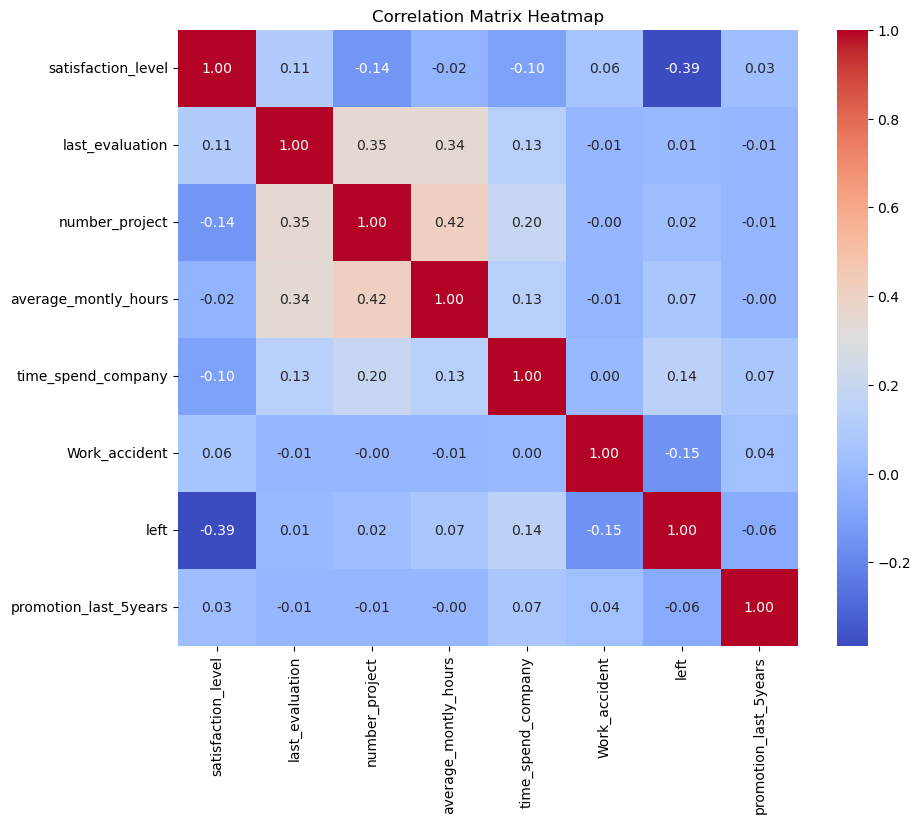

In [7]:
numerical_columns = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years']
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='0.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


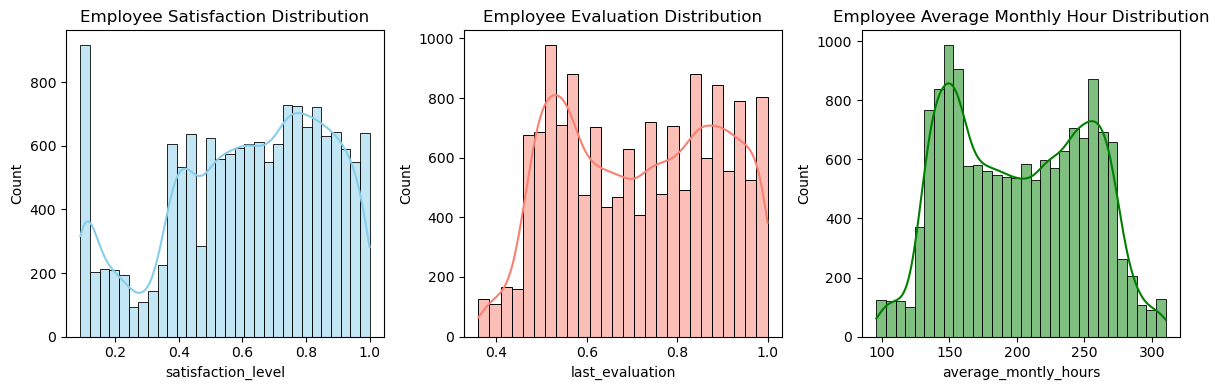

In [8]:
# 2.2 Draw the distribution plot of Employee satisfaction, Evaluation and Average Monthly hours
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(df['satisfaction_level'], kde=True, color='skyblue')
plt.title('Employee Satisfaction Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['last_evaluation'], kde=True, color='salmon')
plt.title('Employee Evaluation Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['average_montly_hours'], kde=True, color='green')
plt.title('Employee Average Monthly Hour Distribution')

plt.tight_layout()
plt.show()

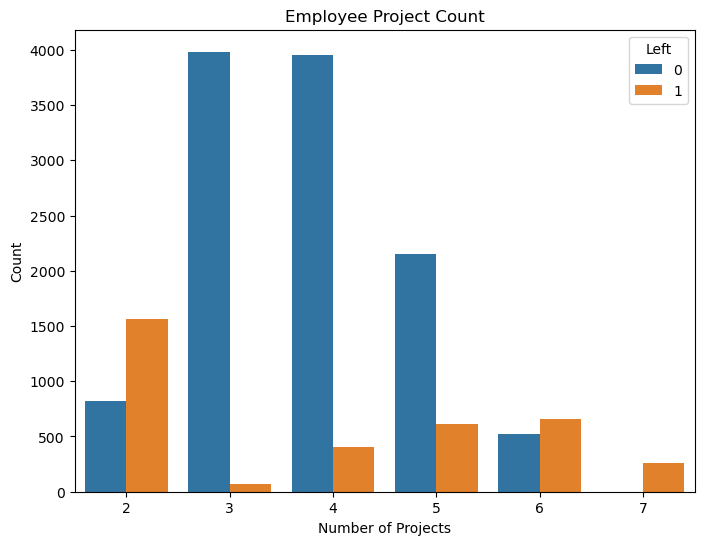

In [9]:
# 2.3 Draw the bar plot of the Employee Project Count of both employees who left and stayed in the organization
plt.figure(figsize=(8, 6))
sns.countplot(x='number_project', hue='left', data=df)
plt.title('Employee Project Count')
plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.legend(title='Left')
plt.show()

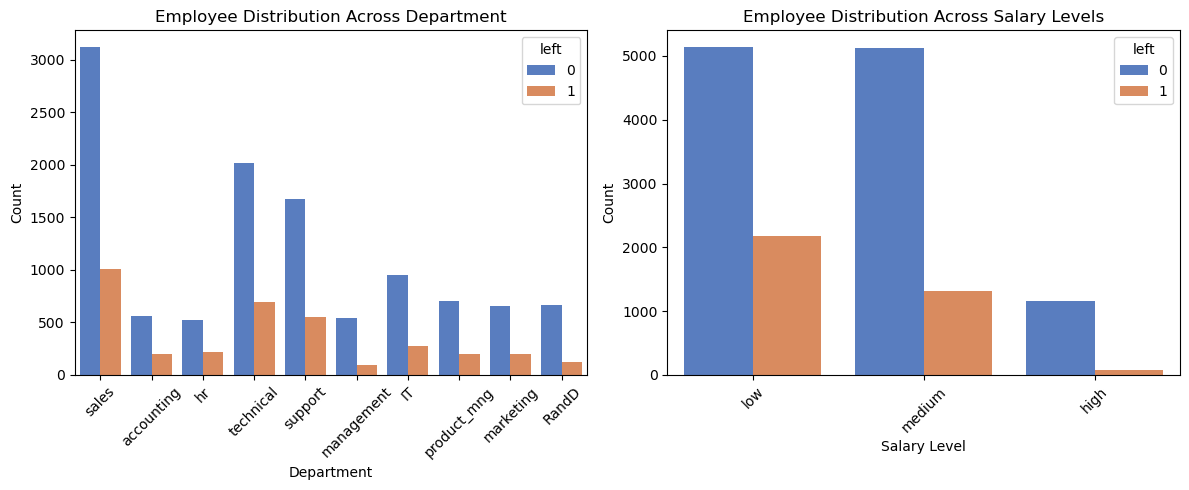

In [10]:
# 2.4 Draw bar plots for categorical columns : sales and salary
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='sales', hue='left', data=df, palette='muted')
plt.title('Employee Distribution Across Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation = 45)

plt.subplot(1, 2, 2)
sns.countplot(x='salary', hue='left', data=df, palette='muted')
plt.title('Employee Distribution Across Salary Levels')
plt.xlabel('Salary Level')
plt.ylabel('Count')
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

In [11]:
# 3. Perform clustering of employees who left based on their satisfaction & evaluation

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
from sklearn.cluster import KMeans

In [14]:
# Select relevant columns
cluster_data = df[['satisfaction_level', 'last_evaluation', 'left']].copy()

In [15]:
# Filter data for employees who left
left_employee_data = cluster_data[cluster_data['left'] == 1]

In [16]:
left_employee_data

,satisfaction_level,last_evaluation,left
0,0.38,0.53,1
1,0.80,0.86,1
2,0.11,0.88,1
3,0.72,0.87,1
4,0.37,0.52,1
...,...,...,...
14994,0.40,0.57,1
14995,0.37,0.48,1
14996,0.37,0.53,1
14997,0.11,0.96,1


In [17]:
# drop the left column as it's no longer needed for clustering
left_employee_data.drop('left', axis=1, inplace=True)

In [18]:
# Perform k-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(left_employee_data)

KMeans(n_clusters=3, random_state=42)

In [19]:
# Add cluster labels to the dataframe
left_employee_data['cluster'] = kmeans.labels_


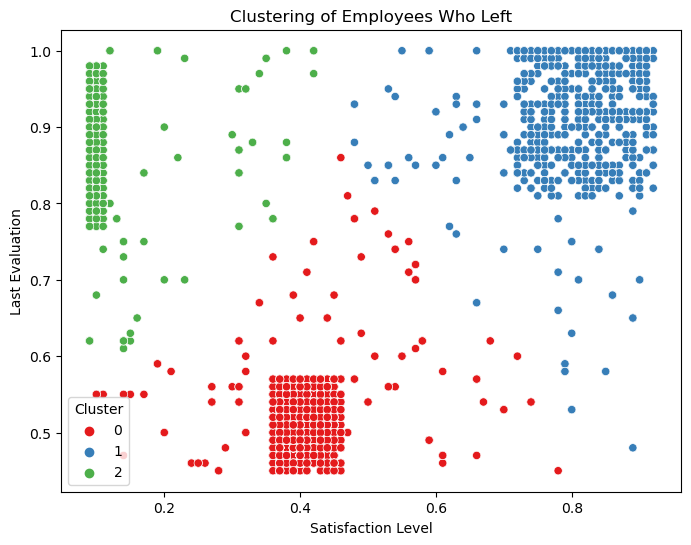

In [20]:
# visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='cluster', data=left_employee_data, palette='Set1', legend='full')
plt.title('Clustering of Employees Who Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.legend(title='Cluster')
plt.show()

In [21]:
left_employee_data['cluster'].value_counts()

cluster
0    1650
1     977
2     944
Name: count, dtype: int64

In [22]:
# 4. Handle the left class imbalance using SMOTE technique

In [23]:
df['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [25]:
df_numerical = df.select_dtypes(include=['int64', 'float64'])
df_categorical = df.select_dtypes(include=['object'])

In [26]:
# convert categorical data into numerical data
df_converted = pd.get_dummies(data=df_categorical, dtype='int')

In [27]:
df_converted.head()

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [28]:
dfn = pd.concat([df_numerical, df_converted], axis=1, join='inner')

In [29]:
dfn.shape

(14999, 21)

In [30]:
dfn.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [31]:
x = dfn.drop("left", axis=1)
y = dfn["left"]

In [32]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=123)

In [33]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((11999, 20), (11999,), (3000, 20), (3000,))

In [34]:
ytrain.value_counts()

left
0    9137
1    2862
Name: count, dtype: int64

In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
sm = SMOTE(random_state=2)
xtrainres, ytrainres = sm.fit_resample(xtrain, ytrain)

In [37]:
ytrainres.value_counts()

left
0    9137
1    9137
Name: count, dtype: int64

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics

In [40]:
# logistics regression
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)

In [41]:
print(cross_val_score(logreg, xtrainres, ytrainres, cv=5).mean())

0.8063931287564478


In [42]:
logreg.fit(xtrainres, ytrainres)
ypred = logreg.predict(xtest)

In [43]:
from sklearn.metrics import classification_report

In [44]:
# logistics regression report

In [46]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      2291
           1       0.51      0.68      0.58       709

    accuracy                           0.77      3000
   macro avg       0.70      0.74      0.71      3000
weighted avg       0.80      0.77      0.78      3000



In [48]:
# for binary classification model ratio of true positive rate and false postive rate
roc_auc_score(ytest, ypred)

0.7390355589019152

[0.         0.20034919 1.        ]
[0.         0.67842031 1.        ]
[inf  1.  0.]
0.7390355589019152


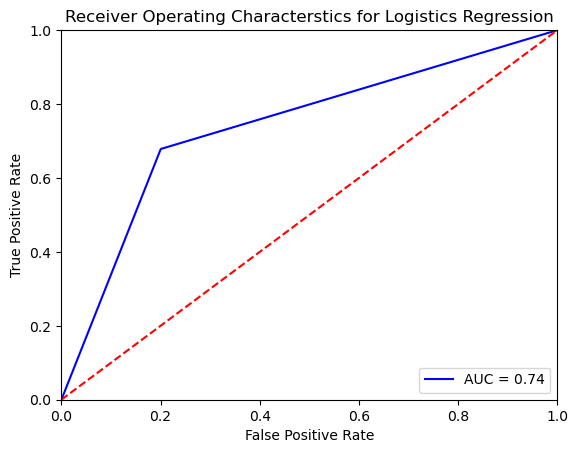

In [49]:
fpr, tpr, threshold = metrics.roc_curve(ytest, ypred)
print(fpr)
print(tpr)
print(threshold)

roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

# method 1: plt
plt.title('Receiver Operating Characterstics for Logistics Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' %roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [50]:
# Random Forest Classifier

In [51]:
randm = RandomForestClassifier(max_depth=5)

In [52]:
print(cross_val_score(randm, xtrainres, ytrainres, cv=5).mean())

0.9489439079561256


In [53]:
randm.fit(xtrainres, ytrainres)
ypred1 = randm.predict(xtest)

In [54]:
metrics.confusion_matrix(ytest, ypred1)

array([[2207,   84],
       [  62,  647]])

In [55]:
print(classification_report(ytest, ypred1))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2291
           1       0.89      0.91      0.90       709

    accuracy                           0.95      3000
   macro avg       0.93      0.94      0.93      3000
weighted avg       0.95      0.95      0.95      3000



[0.         0.03666521 1.        ]
[0.         0.91255289 1.        ]
[inf  1.  0.]
0.9379438398491923


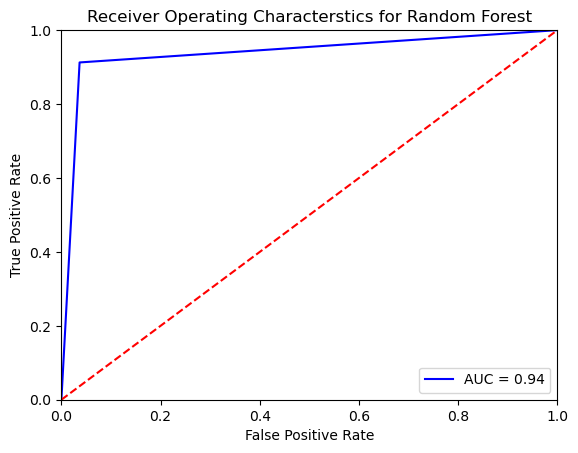

In [56]:
fpr, tpr, threshold = metrics.roc_curve(ytest, ypred1)
print(fpr)
print(tpr)
print(threshold)

roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

# method 1: plt
plt.title('Receiver Operating Characterstics for Random Forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' %roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [57]:
# Gradient Boosting Classifier

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

In [59]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

In [60]:
print(cross_val_score(gb, xtrainres, ytrainres, cv=5).mean())

0.9477401225125174


In [61]:
gb.fit(xtrainres, ytrainres)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [62]:
ypred2 = gb.predict(xtest)

In [63]:
# Gradient Boost Classification Report

In [64]:
metrics.confusion_matrix(ytest, ypred2)

array([[2172,  119],
       [  46,  663]])

In [65]:
print(classification_report(ytest, ypred2))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2291
           1       0.85      0.94      0.89       709

    accuracy                           0.94      3000
   macro avg       0.91      0.94      0.93      3000
weighted avg       0.95      0.94      0.95      3000



In [66]:
roc_auc_score(ytest, ypred2)

0.9415887519631305

[0.         0.05194238 1.        ]
[0.         0.93511989 1.        ]
[inf  1.  0.]
0.9415887519631305


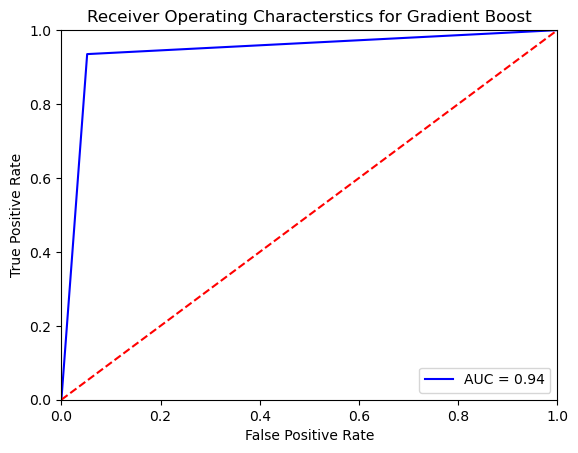

In [67]:
fpr, tpr, threshold = metrics.roc_curve(ytest, ypred2)
print(fpr)
print(tpr)
print(threshold)

roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

# method 1: plt
plt.title('Receiver Operating Characterstics for Gradient Boost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' %roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [70]:
# Apply AdaBoost
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=70)

In [71]:
adaboost.fit(xtrainres, ytrainres)

AdaBoostClassifier(n_estimators=70)

In [72]:
ypred3 = adaboost.predict(xtest)

In [73]:
print(classification_report(ytest, ypred3))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2291
           1       0.83      0.93      0.88       709

    accuracy                           0.94      3000
   macro avg       0.90      0.94      0.92      3000
weighted avg       0.94      0.94      0.94      3000



In [76]:
import xgboost

In [77]:
from xgboost import XGBClassifier

xgb = XGBClassifier(gamma = 50)

In [79]:
xgb.fit(xtrainres, ytrainres)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=50, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [81]:
ypred4 = xgb.predict(xtest)

In [82]:
print(classification_report(ytest, ypred4))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2291
           1       0.92      0.93      0.93       709

    accuracy                           0.97      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.97      0.97      0.97      3000



In [84]:
col = xtrainres.columns
col

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [85]:
feature_labels = np.array(col)

In [86]:
importance = randm.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{} - {:.2f}%'.format(feature_labels[index], (importance[index] * 100.0)))

sales_hr - 0.01%
sales_accounting - 0.01%
sales_support - 0.02%
sales_marketing - 0.03%
sales_IT - 0.03%
sales_technical - 0.04%
sales_sales - 0.05%
sales_product_mng - 0.08%
promotion_last_5years - 0.15%
sales_management - 0.19%
sales_RandD - 0.38%
salary_medium - 0.49%
salary_low - 0.68%
salary_high - 2.18%
Work_accident - 4.22%
last_evaluation - 9.33%
average_montly_hours - 12.18%
number_project - 17.06%
time_spend_company - 25.83%
satisfaction_level - 27.05%


In [87]:
predict_probability = randm.predict_proba(xtest)

In [90]:
predict_probability[:, 1]

array([0.0481537 , 0.11888077, 0.10460641, ..., 0.70075371, 0.07125205,
       0.16856888])

In [91]:
zone = []
prob = []

for i in predict_probability[:, 1]:
    prob.append(i)

    if i <= 0.2:
        zone.append("Safe Zone")
    elif (i > 0.2 and i <= 0.6):
        zone.append("Low Risk Zone")
    elif (i > 0.6 and i <= 0.9):
        zone.append("Medium Risk Zone")
    else:
        zone.append("High Risk Zone")

In [92]:
categories = ["Safe Zone", "Low Risk Zone", "Medium Risk Zone", "High Risk Zone"]
color = ["Green", "Yellow", "Orange", "Red"]

In [93]:
colordict = dict(zip(categories, color))

In [94]:
clr = pd.DataFrame({"zone": zone, "probability": prob})

In [95]:
clr["zone"].unique()

array(['Safe Zone', 'High Risk Zone', 'Medium Risk Zone', 'Low Risk Zone'],
      dtype=object)

In [96]:
clr["Color"] = clr["zone"].apply(lambda x: colordict[x])

In [98]:
clr.head(10)

,zone,probability,Color
0,Safe Zone,0.048154,Green
1,Safe Zone,0.118881,Green
2,Safe Zone,0.104606,Green
3,Safe Zone,0.097144,Green
4,Safe Zone,0.111712,Green
5,Safe Zone,0.090999,Green
6,High Risk Zone,0.932788,Red
7,Medium Risk Zone,0.728505,Orange
8,Safe Zone,0.136171,Green
9,Safe Zone,0.041731,Green


In [99]:
c = ["Green", "Red", "Orange", "Yellow"]

<Axes: xlabel='count', ylabel='zone'>

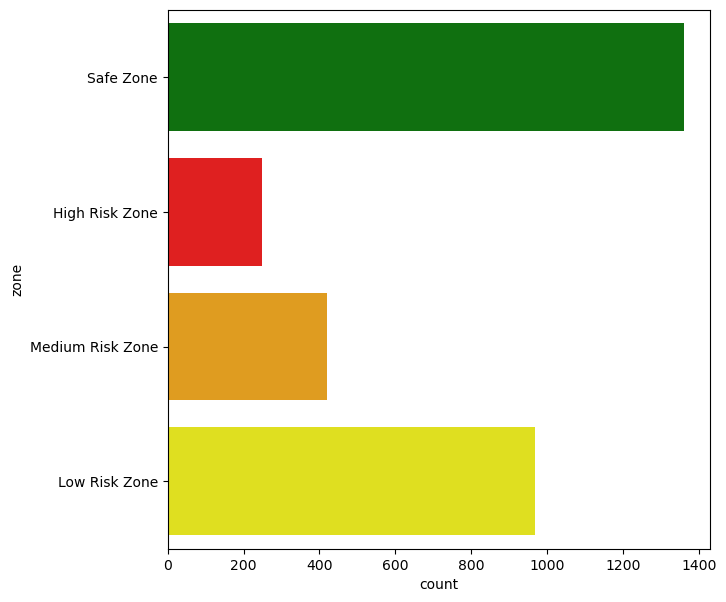

In [110]:
plt.figure(figsize=(7, 7))
sns.countplot(y='zone', data=clr, palette=c)

In [111]:
clr['Color'].value_counts()

Color
Green     1362
Yellow     969
Orange     419
Red        250
Name: count, dtype: int64